In [348]:
import Base.print_matrix
import Base.repeat
using Dates
import Statistics
using Printf
using Plots
using DataFrames
import XLSX

In [228]:
function cauchy(x)
#FUNCTION TO CREATE THE CAUCHY MATRIX
    empty_array = []
    rows = x
    for i in 1:x #run through the 15 columns of the matrix
        row = []
        for j in 1:rows #create the 15 rows of the matrix
            if i == j #if main diagonal
                a = j+rand(10000:10100)
                b = j
                append!(row, (a-b))
            else
                a = j+rand(100:200)
                b = j
                append!(row, (a-b))
            end
        end
        append!(empty_array, row)
    end
    empty_array = reshape(empty_array, (x,x))
    unknown_vector = [1 for x in 1:x] #vector x with the unknown elements
    return empty_array, unknown_vector, empty_array*unknown_vector #returns the matrix, the unknowns vectors (filled with 1) and the solution vector 'b' as Ax=b.
end
    
function hilbert(x)
#FUNCTION TO CREATE THE HILBERT MATRIX
    empty_array = []
    rows = x
    for i in 0:(x-1) #run through the 15 columns of the matrix
        row = []
        for j in 0:(rows-1) #create the 15 rows of the matrix
            if i == j #if main diagonal
                a = j+rand(10000:10100)
                b = j
                append!(row, (a-b-1))
            else
                a = j+rand(100:200)
                b = j
                append!(row, (a-b-1))
            end
        end
        append!(empty_array, row)
    end
    empty_array = reshape(empty_array, (x,x))
    unknown_vector = [1 for x in 1:x] #vector x with the unknown elements
    return empty_array, unknown_vector, empty_array*unknown_vector #returns the matrix, the unknowns vectors (filled with 1) and the solution vector 'b' as Ax=b.
end

function vandermonde(x)
#FUNCTION TO CREATE THE VANDERMONDE MATRIX
    empty_array = []
    rows = x
    for i in 1:x #run through the 15 columns of the matrix
        row = []
        for j in 1:(rows) #create the 15 rows of the matrix
            a = i^(j-1)
            append!(row, a)
        end
        append!(empty_array, row)
    end
    empty_array = reshape(empty_array, (x,x))
    unknown_vector = [1 for x in 1:(x)] #vector x with the unknown elements
    return empty_array, unknown_vector, empty_array*unknown_vector #returns the matrix, the unknowns vectors (filled with 1) and the solution vector 'b' as Ax=b.
end

function toeplitz(x)
#FUNCTION TO CREATE THE TOEPLITZ MATRIX
    empty_array = [] #matrix array holder
    reference_array = [z for z in 1:(x*2-1)] #the 15 elements of the array
    for j in 1:x #runs through the columns
        row = []
        for i in 1:x #runs through the reference_array indexes
            if i == j #if main diagonal
                a = reference_array[1:1]
                append!(row, a)
            elseif i > j #if row index greater than column index
                a = reference_array[(i+x-1):(i+x-1)]
                append!(row, a)
            else #if column index is greater than row index
                a = reference_array[(j-i+1):(j-i+1)]
                append!(row, a)
            end
        end
        append!(empty_array, row)
    end
    empty_array = reshape(empty_array, (x,x))
    unknown_vector = [1 for x in 1:x] #vector x with the unknown elements
    return empty_array, unknown_vector, empty_array*unknown_vector #returns the matrix, the unknowns vectors (filled with 1) and the solution vector 'b' as Ax=b.
end

toeplitz (generic function with 1 method)

In [3]:
function gauss_elimination(x,u,b) #the matrix, the unkown vectors (filled with 1) and the b solution vector expected
    #FUNCTION TO SOLVE A SYSTEM BY THE GAUSS ELIMINATION PROCESS
    #the input variable 'x' is the matrix object
    #the input variable 'b' is the solution vector
    x = hcat(x,b)
    columns_size = size(x)[2] #get the number of columns on the matrix object
    #first we get the pivot element
    for i in 2:(columns_size-1) #run for the n number of columns
        for z in 1:(i-1) #col1 - col2; col1-col3 and col2 - col3 and so on...
            PIVOT = real(x[i:i,z:z])
            for j in 1:columns_size #run through all the columns
                x[i:i,j:j] = x[i:i,j:j] - PIVOT*real(x[z:z,j:j])/real(x[z:z,z:z])
            end
        end
    end
    x = real(x)
    real_matrix = x[1:(columns_size-1), 1:(columns_size-1)]
    solution = x[1:(columns_size-1),columns_size:columns_size]
    unknown_vector = real_matrix\solution #calculate the x vector from the equation Ax=b.
    return unknown_vector, u
end

gauss_elimination (generic function with 1 method)

In [234]:
function LU_Factorization(x,u,b)
    #FUNCTION TO SOLVE A SYSTEM BY USING THE LU FACTORIZATION METHOD
    #The input variable x is the input matrix
    #The input variable u is the unkowns ('x') vector from Ax=b
    #The input variable b is the solution vector
    
    #print the matrix
    #print_matrix(stdout, x) #COMMENTED OUT
    
    #This section of code is to create the L matrix
    columns_size = size(x)[2]
    matrix_l = zeros((columns_size,columns_size))
    for i in 1:columns_size
        for j in 1:columns_size
            if i == j
                matrix_l[i:i,i:i] .= 1 #dot operator on the matrix
            end
        end
    end
    #end of section
    
    #This section is dedicated to the gaussian elimination process
    columns_size = size(x)[2] #get the number of columns on the matrix object
    #first we get the pivot element
    for i in 2:(columns_size) #run for the n number of columns
        for z in 1:(i-1) #col1 - col2; col1-col3 and col2 - col3 and so on...
            PIVOT = real(x[i:i,z:z])
            matrix_l[i:i,z:z] = real(x[i:i,z:z])/real(x[z:z,z:z])
            for j in 1:columns_size #run through all the columns
                x[i:i,j:j] = x[i:i,j:j] - PIVOT*real(x[z:z,j:j])/real(x[z:z,z:z])
            end
        end
    end
    #end of section
    
    #Create the U matrix
    matrix_u = copy(x)
    
    #Now we calculate the unkown Y vector from the equation LY=b
    matrix_l = real(matrix_l)
    b = real(b)
    unkown_vector_y = matrix_l\b
    
    #Now we calculate the unkown vector x from the equation Ux=Y
    matrix_u = real(matrix_u)
    unkown_vector_y = real(unkown_vector_y)
    unkown_vector_x = matrix_u\unkown_vector_y
    
    #Reshape the elements into matrix
    unkown_vector_x = reshape(unkown_vector_x, length(unkown_vector_x),1)
    u = reshape(u, length(u), 1)
    
    #Finally we return the calculated x vector and the original x vector
    return unkown_vector_x, u
end

LU_Factorization (generic function with 1 method)

In [242]:
function gauss_jordan_elimination(x,u,b)
    #FUNCTION CREATED TO SOLVE A SYSTEM BY THE GAUSS-JORDAN METHOD
    #The input variable x is the input matrix
    #The input variable u is the unkowns ('x') vector from Ax=b
    #The input variable b is the solution vector
    
    #Augmented matrix format
    x = hcat(x,b)
    
    #This section is dedicated to the gauss-jordan elimination process to build the lower triangular matrix
    columns_size = size(x)[2] #get the number of columns on the matrix object
    #first we get the pivot element
    for i in 2:(columns_size-1) #run for the n number of columns
        for z in 1:(i-1) #col1 - col2; col1-col3 and col2 - col3 and so on...
            PIVOT = real(x[i:i,z:z])
            for j in 1:columns_size #run through all the columns
                x[i:i,j:j] = x[i:i,j:j] - PIVOT*real(x[z:z,j:j])/real(x[z:z,z:z])
            end
        end
    end
    
    #This section is dedicated to the gauss-jordan elimination process to build the upper triangular matrix
    row_size = size(x)[1] #get the number of columns on the matrix object
    #first we get the pivot element
    for i in (row_size-1):-1:1 #run for the n number of columns from the last to the first one
        for z in row_size:-1:(i+1) #col1 - col2; col1-col3 and col2 - col3 and so on...
            PIVOT = real(x[i:i,z:z])[1]
            for j in columns_size:-1:(z) #run through all the columns
                x[i:i,j:j] = x[i:i,j:j] - PIVOT*real(x[z:z,j:j])/real(x[z:z,z:z])
            end
        end
    end
    #end of section
    
    #reshape vector u
    u = reshape(u, length(u), 1)
    b = reshape(b, length(b), 1)
    new_b = real(x[1:row_size,columns_size:columns_size])
    x = real(x[1:row_size,1:row_size])
    
    #Create the modified unknown vectors
    unkown_vector_x = x\new_b
    
    #Reshape the elements into matrix
    unkown_vector_x = reshape(unkown_vector_x, length(unkown_vector_x),1)
    
    #return the calculated unkown vector and the expected one
    return unkown_vector_x, u
end

gauss_jordan_elimination (generic function with 1 method)

In [342]:
function jacobi_elimination(x,u,b)
    #FUNCTION CREATED TO IMPLEMENT GAUSS-SEIDEL ELIMINATION METHOD
    #The input variable x is the input matrix
    #The input variable u is the unkowns ('x') vector from Ax=b
    #The input variable b is the solution vector
    
    #print the matrix
    #print_matrix(stdout, hcat(x,b)) #COMMENTED OUT
    
    #row size
    row_size = size(x)[1]
    
    #col size
    col_size = size(x)[2]
    
    #create the error array to hold the differences between the previous parameteres and the new ones
    error_array = []
    
    #create the jacobi 'x' vector with all values equal to 0, in the format Ax=b
    jacobi_x_vector = []
    for i in 1:row_size
        append!(jacobi_x_vector, 0) #all elements at first are 0
    end
    #reshape it
    jacobi_x_vector = reshape(jacobi_x_vector, row_size,1)
    
    #create the jacobi 'b' vector, where we store the result of each equation solving iteration
    jacobi_b_vector = []
    for i in 1:row_size
        append!(jacobi_b_vector, 0) #all elements at first are 0
    end
    #reshape it
    jacobi_b_vector = reshape(jacobi_b_vector, row_size,1)
    
    #establish a threshold to stop the iteration
    threshold = 0.0001 #if less than 0.001 then accept the result, else keep going
    iteration = 0
    error = 99
    iteration_limit = 500
    for i in 1:iteration_limit
        for j in 1:row_size #iterate through all the rows
            matrix_pivot = x[j:j,j:j][1] #get the main diagonal element which we will be dividing later on for
            x[j:j,1:col_size] = -x[j:j,1:col_size] #if you pass the variables to the other side, change their signal
            x[j:j,j:j] .= b[j:j,1:1] #turn it to b because we will be dividing the matrix_pivot element from above at the solution vector
            loop_x_vector = copy(jacobi_x_vector) #an internal copy of the original jacobi_x_vector containing x0,y0,z0 and all for the loop so we can change its values
            keep_value = loop_x_vector[j:j,1,1][1] #get the element of the row which we are currently iterating through
            loop_x_vector[j:j,1,1] .= 1 #change that element's value to 1, since we will not be using it in the equation solving part
            jacobi_b_vector[j:j,1:1] = (x[j:j,1:col_size]*loop_x_vector[1:row_size,1:1])/matrix_pivot #add the calculated value of the equation the a 'b' vector which will hold our answers
            loop_x_vector[j:j,1,1] .= keep_value #return that vector's original value to what it was so it can be used in the next iteration
            x[j:j,1:col_size] = -x[j:j,1:col_size] #change it back to normal
            x[j:j,j:j] .= matrix_pivot #return the matrix main diagonal element for that row to what it was so it can be used in the next iteration
        end
        error_array = jacobi_x_vector - jacobi_b_vector
        error_array = broadcast(abs, error_array)
        error = maximum(error_array)
        jacobi_x_vector = copy(jacobi_b_vector)
        if error<=threshold
            iteration = i
            print(iteration)
            break
        end
    end
    
    #return the vectors
    return jacobi_x_vector, u
end

jacobi_elimination (generic function with 1 method)

In [345]:
function gauss_seidel_elimination(x,u,b)
    #FUNCTION CREATED TO IMPLEMENT GAUSS-SEIDEL ELIMINATION METHOD
    #The input variable x is the input matrix
    #The input variable u is the unkowns ('x') vector from Ax=b
    #The input variable b is the solution vector
    
    #print the matrix
    #print_matrix(stdout, hcat(x,b)) #COMMENTED OUT
    #println("")
    
    #row size
    row_size = size(x)[1]
    
    #col size
    col_size = size(x)[2]
    
    #create the error array to hold the differences between the previous parameteres and the new ones
    error_array = []
    
    #create the jacobi 'x' vector with all values equal to 0, in the format Ax=b
    jacobi_x_vector = []
    for i in 1:row_size
        append!(jacobi_x_vector, 0) #all elements at first are 0
    end
    #reshape it
    jacobi_x_vector = reshape(jacobi_x_vector, row_size,1)
    
    #create the jacobi 'b' vector, where we store the result of each equation solving iteration
    jacobi_b_vector = []
    for i in 1:row_size
        append!(jacobi_b_vector, 0) #all elements at first are 0
    end
    #reshape it
    jacobi_b_vector = reshape(jacobi_b_vector, row_size,1)
    
    #establish a threshold to stop the iteration
    threshold = 0.0001 #if less than 0.001 then accept the result, else keep going
    iteration = 0
    error = 99
    iteration_limit = 500
    for i in 1:iteration_limit
        original_jacobi_x_vector = copy(jacobi_x_vector)
        for i in 1:row_size #iterate through all the rows
            matrix_pivot = x[i:i,i:i][1] #get the main diagonal element which we will be dividing later on for
            x[i:i,1:col_size] = -x[i:i,1:col_size] #if you pass the variables to the other side, change their signal
            x[i:i,i:i] .= b[i:i,1:1] #turn it to b because we will be dividing the matrix_pivot element from above at the solution vector
            loop_x_vector = copy(jacobi_x_vector) #an internal copy of the original jacobi_x_vector containing x0,y0,z0 and all for the loop so we can change its values
            keep_value = loop_x_vector[i:i,1,1][1] #get the element of the row which we are currently iterating through
            loop_x_vector[i:i,1,1] .= 1 #change that element's value to 1, since we will not be using it in the equation solving part
            jacobi_b_vector[i:i,1:1] = (x[i:i,1:col_size]*loop_x_vector[1:row_size,1:1])/matrix_pivot #add the calculated value of the equation the a 'b' vector which will hold our answers
            loop_x_vector[i:i,1,1] .= keep_value #return that vector's original value to what it was so it can be used in the next iteration
            jacobi_x_vector[i:i,1:1] .= jacobi_b_vector[i:i,1:1]
            x[i:i,1:col_size] = -x[i:i,1:col_size] #change it back to normal
            x[i:i,i:i] .= matrix_pivot #return the matrix main diagonal element for that row to what it was so it can be used in the next iteration
        end
        error_array = jacobi_b_vector - original_jacobi_x_vector
        error_array = broadcast(abs, error_array)
        error = maximum(error_array)
        if error<=threshold
            iteration = i
            print(iteration)
            break
        end
        jacobi_x_vector = jacobi_b_vector
    end
    
    #return the vectors
    return jacobi_x_vector, u
end

gauss_seidel_elimination (generic function with 1 method)

In [245]:
function mean_squared_error(x,u)
    #FUNCTION TO CALCULATE THE MEAN SQUARED ERROR OF TWO VECTORS ITEM BY ITEM
    error = 0 #empty element to accumulate sum
    col_size = size(x)[2] #size column for the iterations
    for i in 1:size(x)[1] #loop from 1 to last row
        error += (u[i:i,1:1][1] - x[i:i,1:1][1])^2 #keep adding the difference between elements
    end
    error = error/size(x)[1]
    return error
end

mean_squared_error (generic function with 1 method)

In [246]:
matrix_array = [cauchy(15), hilbert(15), vandermonde(15), toeplitz(15)]

4-element Vector{Tuple{Matrix{Any}, Vector{Int64}, Vector{Any}}}:
 ([10004 105 … 139 136; 195 10092 … 142 195; … ; 179 177 … 10099 145; 130 198 … 180 10100], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [12036, 12303, 12033, 12286, 12125, 12131, 12112, 12256, 12233, 12245, 12214, 12163, 12203, 12251, 12252])
 ([10007 114 … 145 157; 167 10027 … 192 121; … ; 180 150 … 10061 153; 198 194 … 154 10024], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [12180, 12252, 12230, 12141, 12115, 11976, 12305, 12254, 12096, 12055, 11966, 12102, 12077, 12164, 12186])
 ([1 1 … 1 1; 1 2 … 14 15; … ; 1 8192 … 793714773254144 1946195068359375; 1 16384 … 11112006825558016 29192926025390625], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [15, 120, 1240, 14400, 178312, 2299200, 30482920, 412420800, 5666482312, 78800938560, 1106532668200, 15662165784000, 223160292749512, 3197503726489920, 46034015337733480])
 ([1 2 … 14 15; 16 1 … 13 14; … ; 28 28 … 1 2; 29 29 … 29 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [133]:
function get_running_time_gauss_elimination(matrixes)
    #FUNCTION TO GET THE RUNNING TIME OF EACH ALGORITHM
    running_time = []
    for matrix in matrixes
        _inner_time_list = []
        for i in 1:50
            run_function = @timed gauss_elimination(matrix[1],matrix[2],matrix[3])
            run_function = run_function[2]
            append!(_inner_time_list, run_function)
        end
        time = Statistics.mean(_inner_time_list)
        append!(running_time, time)
    end
    return running_time
end

gauss_elimination_time = get_running_time_gauss_elimination(matrix_array)

4-element Vector{Any}:
 0.007876035999999998
 0.007414246
 0.007316743999999999
 0.007466406000000001

In [134]:
function get_running_time_lu(matrixes)
    #FUNCTION TO GET THE RUNNING TIME OF EACH ALGORITHM
    running_time = []
    for matrix in matrixes
        _inner_time_list = []
        for i in 1:50
            run_function = @timed LU_factorization(matrix[1],matrix[2],matrix[3])
            run_function = run_function[2]
            append!(_inner_time_list, run_function)
        end
        time = Statistics.mean(_inner_time_list)
        append!(running_time, time)
    end
    return running_time
end

lu_decomposition_time = get_running_time_gauss_elimination(matrix_array)

4-element Vector{Any}:
 0.007711167999999998
 0.007432881999999998
 0.007295256000000001
 0.007473948000000001

In [137]:
function get_running_time_gauss_jordan(matrixes)
    #FUNCTION TO GET THE RUNNING TIME OF EACH ALGORITHM
    running_time = []
    for matrix in matrixes
        _inner_time_list = []
        for i in 1:50
            run_function = @timed gauss_jordan_elimination(matrix[1],matrix[2],matrix[3])
            run_function = run_function[2]
            append!(_inner_time_list, run_function)
        end
        time = Statistics.mean(_inner_time_list)
        append!(running_time, time)
    end
    return running_time
end

gauss_jordan_time = get_running_time_gauss_jordan(matrix_array)

4-element Vector{Any}:
 0.014641993999999993
 0.010549778000000001
 0.010627282
 0.010206056000000002

In [143]:
function get_running_time_jacobi(matrixes)
    #FUNCTION TO GET THE RUNNING TIME OF EACH ALGORITHM
    running_time = []
    for matrix in matrixes
        _inner_time_list = []
        for i in 1:50
            run_function = @timed jacobi_elimination(matrix[1],matrix[2],matrix[3])
            run_function = run_function[2]
            append!(_inner_time_list, run_function)
        end
        time = Statistics.mean(_inner_time_list)
        append!(running_time, time)
    end
    return running_time
end

jacobi_time = get_running_time_jacobi(matrix_array)

4-element Vector{Any}:
 0.001333954
 0.0012631079999999998
 0.08554167400000004
 0.08089419000000002

In [144]:
function get_running_time_gauss_seidel(matrixes)
    #FUNCTION TO GET THE RUNNING TIME OF EACH ALGORITHM
    running_time = []
    for matrix in matrixes
        _inner_time_list = []
        for i in 1:50
            run_function = @timed gauss_seidel_elimination(matrix[1],matrix[2],matrix[3])
            run_function = run_function[2]
            append!(_inner_time_list, run_function)
        end
        time = Statistics.mean(_inner_time_list)
        append!(running_time, time)
    end
    return running_time
end

gauss_seidel_time = get_running_time_gauss_seidel(matrix_array)

4-element Vector{Any}:
 0.0008972399999999999
 0.0007926199999999998
 0.08341021
 0.078825892

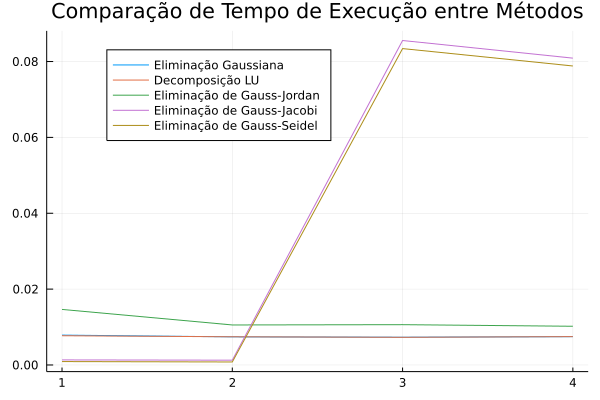

In [187]:
#Generate the plots for each of the running times
#gauss_elimination_time, lu_decomposition_time,
x = 1:4
y = gauss_elimination_time # These are the plotting data
p = plot(x,y, title = "Comparação de Tempo de Execução entre Métodos", label="Eliminação Gaussiana", legend=(0.2, 0.9))
z = lu_decomposition_time
p_1 = plot!(p, x, z, label="Decomposição LU")
w = gauss_jordan_time
p_2 = plot!(p_1, x, w, label="Eliminação de Gauss-Jordan")
a = jacobi_time
p_3 = plot!(p_2, x, a, label="Eliminação de Gauss-Jacobi")
b = gauss_seidel_time
plot!(p_3, x, b, label="Eliminação de Gauss-Seidel")

In [247]:
function get_mse_gauss_elimination(matrixes)
    #FUNCTION TO GET THE RUNNING TIME OF EACH ALGORITHM
    errors = []
    for matrix in matrixes
        _inner_error_list = []
        for i in 1:50
            run_function = mean_squared_error(gauss_elimination(matrix[1],matrix[2],matrix[3])[1], gauss_elimination(matrix[1],matrix[2],matrix[3])[2])
            append!(_inner_error_list, run_function)
        end
        error = Statistics.mean(_inner_error_list)
        append!(errors, error)
    end
    return errors
end

mse_gauss_elimination = get_mse_gauss_elimination(matrix_array)

4-element Vector{Any}:
 8.628166150854817e-32
 4.1086505480261044e-32
 7.917650392424995e-14
 1.0076876334088816e-28

In [248]:
function get_mse_lu(matrixes)
    #FUNCTION TO GET THE RUNNING TIME OF EACH ALGORITHM
    errors = []
    for matrix in matrixes
        _inner_error_list = []
        for i in 1:50
            run_function = mean_squared_error(LU_Factorization(matrix[1],matrix[2],matrix[3])[1], LU_Factorization(matrix[1],matrix[2],matrix[3])[2])
            append!(_inner_error_list, run_function)
        end
        error = Statistics.mean(_inner_error_list)
        append!(errors, error)
    end
    return errors
end

mse_lu = get_mse_lu(matrix_array)

4-element Vector{Any}:
    0.015048000978449787
    0.014073788290796916
    3.2474120103370554e17
 1085.0152718447905

In [249]:
function get_mse_gauss_jordan(matrixes)
    #FUNCTION TO GET THE RUNNING TIME OF EACH ALGORITHM
    errors = []
    for matrix in matrixes
        _inner_error_list = []
        for i in 1:50
            run_function = mean_squared_error(gauss_jordan_elimination(matrix[1],matrix[2],matrix[3])[1], gauss_jordan_elimination(matrix[1],matrix[2],matrix[3])[2])
            append!(_inner_error_list, run_function)
        end
        error = Statistics.mean(_inner_error_list)
        append!(errors, error)
    end
    return errors
end

mse_gauss_jordan = get_mse_gauss_jordan(matrix_array)

4-element Vector{Any}:
    0.015355103039234477
    0.014361008459996853
    3.313685724833812e17
 1107.1584406579493

In [250]:
function get_mse_jacobi(matrixes)
    #FUNCTION TO GET THE RUNNING TIME OF EACH ALGORITHM
    errors = []
    for matrix in matrixes
        _inner_error_list = []
        for i in 1:50
            run_function = mean_squared_error(jacobi_elimination(matrix[1],matrix[2],matrix[3])[1], jacobi_elimination(matrix[1],matrix[2],matrix[3])[2])
            append!(_inner_error_list, run_function)
        end
        error = Statistics.mean(_inner_error_list)
        append!(errors, error)
    end
    return errors
end

mse_gauss_jacobi = get_mse_jacobi(matrix_array)

4-element Vector{Any}:
    0.015355103623457385
    0.01436100864044912
    3.313685724833628e17
 1107.1584406579493

In [301]:
function get_mse_gauss_seidel(matrixes)
    #FUNCTION TO GET THE RUNNING TIME OF EACH ALGORITHM
    errors = []
    for matrix in matrixes
        _inner_error_list = []
        error = mean_squared_error(gauss_seidel_elimination(matrix[1],matrix[2],matrix[3])[1], gauss_seidel_elimination(matrix[1],matrix[2],matrix[3])[2])
        append!(errors, error)
    end
    return errors
end

mse_gauss_seidel = get_mse_gauss_seidel(matrix_array)

4-element Vector{Any}:
    0.015355103623457394
    0.014361008640449122
    3.313685724833628e17
 1107.1584406579493

In [347]:
cauchy_matrix, x_vectors, cauchy_solution = toeplitz(15)
unknown_vectors_calculated, real_solution = gauss_seidel_elimination(cauchy_matrix, x_vectors, cauchy_solution)
gauss_error = mean_squared_error(unknown_vectors_calculated, real_solution)
println("")
@printf "The Mean Squared Error (MSE) of the points was %s" gauss_error


The Mean Squared Error (MSE) of the points was NaN

In [337]:
error_array = [1.1093356479670479e-31,6.820359909723331e-32,7.917650392424997e-14,1.007687633408882e-28,
               7.149051953565419e-32,5.012553668591846e-32,2.2519808289671367e-14,6.721587950548783e-29,
               8.052955074131162e-32,5.505591734354978e-32,7.918070822895165e-14,9.542669589834467e-29,
               1.3368106298084047e-11,1.2151828563663118e-11,999,999,
               2.041698247288203e-13,1.5104756308808304e-13,999,999]

20-element Vector{Float64}:
   1.1093356479670479e-31
   6.820359909723331e-32
   7.917650392424997e-14
   1.007687633408882e-28
   7.149051953565419e-32
   5.012553668591846e-32
   2.2519808289671367e-14
   6.721587950548783e-29
   8.052955074131162e-32
   5.505591734354978e-32
   7.918070822895165e-14
   9.542669589834467e-29
   1.3368106298084047e-11
   1.2151828563663118e-11
 999.0
 999.0
   2.041698247288203e-13
   1.5104756308808304e-13
 999.0
 999.0

In [297]:
names = ["Eliminação Gaussiana","Decomposição LU","Eliminação de Gauss-Jordan","Eliminação de Gauss-Jacobi","Eliminação de Gauss-Seidel"]

process = []
for name in names
    l = repeat([name], 4)
    append!(process, l)
end

matrixes_list = ["Cauchy","Hilbert","Vandermonde","Toeplitz"]
matrixes = repeat(matrixes_list, 5)

20-element Vector{String}:
 "Cauchy"
 "Hilbert"
 "Vandermonde"
 "Toeplitz"
 "Cauchy"
 "Hilbert"
 "Vandermonde"
 "Toeplitz"
 "Cauchy"
 "Hilbert"
 "Vandermonde"
 "Toeplitz"
 "Cauchy"
 "Hilbert"
 "Vandermonde"
 "Toeplitz"
 "Cauchy"
 "Hilbert"
 "Vandermonde"
 "Toeplitz"

In [338]:
df = DataFrame()
df.Processo = process
df.Matriz = matrixes
df.Erros = error_array

df

,Processo,Matriz,Erros
,Any,String,Float64
1,Eliminação Gaussiana,Cauchy,1.10934e-31
2,Eliminação Gaussiana,Hilbert,6.82036e-32
3,Eliminação Gaussiana,Vandermonde,7.91765e-14
4,Eliminação Gaussiana,Toeplitz,1.00769e-28
5,Decomposição LU,Cauchy,7.14905e-32
6,Decomposição LU,Hilbert,5.01255e-32
7,Decomposição LU,Vandermonde,2.25198e-14
8,Decomposição LU,Toeplitz,6.72159e-29
9,Eliminação de Gauss-Jordan,Cauchy,8.05296e-32


In [ ]:
XLSX.writetable("df.xlsx", collect(DataFrames.eachcol(df)), DataFrames.names(df))